In [1]:
"""
This module provides a class with 6 methods
"""

import os
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

class Group22:
    """
    A class to to examine a dataset on agriculture.

    ...

    Attributes
    ----------
    url : str
        url of dataset
    filename : str
        filename of dataset

    Methods
    -------
    download_data:
        downloads the dataset and turns it into a pandas dataframe
    """
    def __init__(self, url, filename):
        """
        Constructs all the necessary attributes for the class object.

        Parameters
        ----------
        url : str
            url of dataset
        filename : str
            filename of dataset
        """
        self.url = url
        self.filename = filename

    def download_data(self):
        """
        Returns a dataframe from the dataset

        Parameters
        ----------
        None

        Returns
        -------
        dataframe
        """
        if not os.path.exists(os.path.join("downloads", self.filename)):
            response = requests.get(self.url)
            if response.status_code == 200:
                with open(os.path.join("downloads", self.filename), "wb") as f:
                    f.write(response.content)
                print(f"{self.filename} has been downloaded")
            else:
                print(f"Error downloading {self.filename}: {response.status_code}")
        else:
            print(f"{self.filename} already exists")

        data_path = os.path.join("downloads", self.filename)
        df = pd.read_csv(data_path, on_bad_lines="skip")
        
        self.df = df

        return df
    
    
    def get_countries(df):
        """
        Returns a list of all the countries of the dataset

        Parameters
        ----------
        df : pandas dataframe
            dataframe of the dataset

        Returns
        -------
        list
        """
        return list(df['Entity'].unique())
    
    def plot_quantity_correlation(df):
        """
        Returns a correlation matrix of the quantity columns

        Parameters
        ----------
        df : pandas dataframe
            dataframe of the dataset

        Returns
        -------
        correlation matrix
        """
        quantity_cols = [col for col in df.columns if '_quantity' in col]
        quantity_df = df[quantity_cols]
        corr_matrix = quantity_df.corr()

        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix of Quantity Columns')
        plt.show()

In [2]:
agr_data = Group22('https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Agricultural%20total%20factor%20productivity%20(USDA)/Agricultural%20total%20factor%20productivity%20(USDA).csv', 'agr_data')
Group22.download_data(agr_data)

agr_data has been downloaded


,Entity,Year,tfp,output,inputs,ag_land_index,labor_index,capital_index,materials_index,output_quantity,...,ag_land_quantity,labor_quantity,capital_quantity,machinery_quantity,livestock_quantity,fertilizer_quantity,animal_feed_quantity,cropland_quantity,pasture_quantity,irrigation_quantity
0,Afghanistan,1961,65.0814,44.8285,68.8807,91.6812,44.5145,141.5215,35.9132,2566730,...,10571,1704,8866,5,6339,57345,2068912,7700,30000,2380
1,Afghanistan,1962,64.0637,45.6182,71.2075,92.2016,45.0207,163.6547,36.3829,2611942,...,10631,1723,10253,6,6228,58146,2082012,7760,30000,2380
2,Afghanistan,1963,61.6217,45.9729,74.6051,92.6352,45.5528,202.0577,37.0801,2632254,...,10681,1743,12659,8,6547,59694,2007829,7810,30000,2380
3,Afghanistan,1964,65.1109,49.0775,75.3752,93.1816,46.1108,203.8875,37.5294,2810010,...,10744,1765,12773,8,6732,60006,2140272,7873,30000,2380
4,Afghanistan,1965,63.8587,51.2121,80.1960,93.1990,46.6948,270.9746,38.5949,2932230,...,10746,1787,16976,12,6946,61821,2171226,7875,30000,2380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12177,Zimbabwe,2015,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,2191374,...,2574,4184,8379,1154,5654,93807,975873,2252,12100,182
12178,Zimbabwe,2016,94.8110,98.1051,103.4744,103.8526,101.2662,97.9759,128.2406,2149850,...,2673,4237,8210,1174,5705,146857,1000004,2349,12100,184
12179,Zimbabwe,2017,101.9830,104.9815,102.9402,99.6960,102.3605,96.4853,141.3410,2300538,...,2566,4283,8085,1180,5601,160356,1113784,2240,12100,187
12180,Zimbabwe,2018,118.1959,121.0832,102.4428,102.8520,103.4662,95.3222,124.3694,2653386,...,2647,4330,7987,1201,5681,146379,940395,2321,12100,187


In [3]:
Group22.get_countries(agr_data.df)

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Caribbean',
 'Central Africa',
 'Central African Republic',
 'Central America',
 'Central Asia',
 'Central Europe',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 'Democratic Republic of Congo',
 'Denmark',
 'Developed Asia',
 'Developed countries',
 'Djibouti',
 'Dominican Republic',
 'East Africa',
 'Eastern Europe',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'Fiji',
 'Finland',
 'Former Soviet Union',
 'France',
 'French Guian

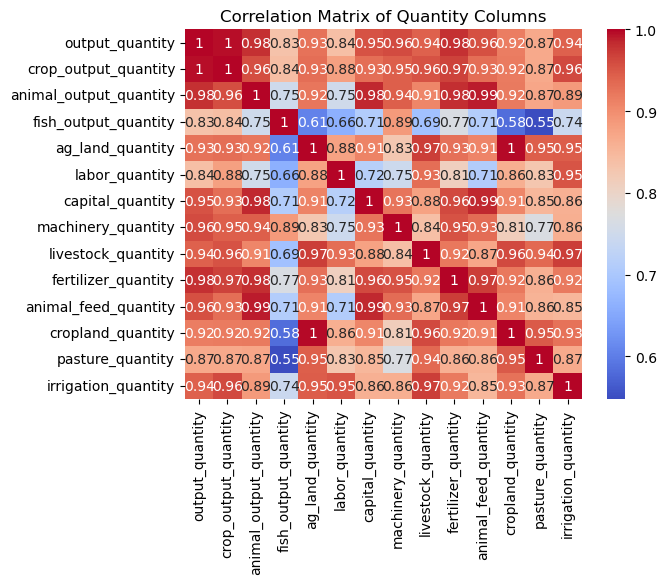

In [4]:
Group22.plot_quantity_correlation(agr_data.df)